In [1]:
import scipy.io

try:
    pmc = scipy.io.loadmat('C:\\Users\\UmurY\\OneDrive\\Masaüstü\\Action_Clusters_Python\\Raw_Files\\actionbetasPMC.mat')
    print("Loaded actionbetasPMC.mat successfully.")
except Exception as e:
    print("Error loading actionbetasPMC.mat:", e)

try:
    ppc = scipy.io.loadmat('C:\\Users\\UmurY\\OneDrive\\Masaüstü\\Action_Clusters_Python\\Raw_Files\\actionbetasPPC.mat')
    print("Loaded actionbetasPPC.mat successfully.")
except Exception as e:
    print("Error loading actionbetasPPC.mat:", e)

try:
    lotc = scipy.io.loadmat('C:\\Users\\UmurY\\OneDrive\\Masaüstü\\Action_Clusters_Python\\Raw_Files\\actionbetasLOTC.mat')
    print("Loaded actionbetasLOTC.mat successfully.")
except Exception as e:
    print("Error loading actionbetasLOTC.mat:", e)

try:
    lotc = lotc['action_betas_rel_sub2_LOTC']
    pmc = pmc['action_betas_rel_sub2_PPC']
    ppc = ppc['action_betas_rel_sub2_PPC']
    print("Accessed data in .mat files successfully.")
except Exception as e:
    print("Error accessing data in .mat files:", e)

Loaded actionbetasPMC.mat successfully.
Loaded actionbetasPPC.mat successfully.
Loaded actionbetasLOTC.mat successfully.
Accessed data in .mat files successfully.


In [2]:
#All in dataframes
import pandas as pd
import numpy as np

lotc = pd.DataFrame(lotc)
pmc = pd.DataFrame(pmc)
ppc = pd.DataFrame(ppc)


In [3]:
#Match matlab indexixng for dfs and rows
lotc.columns = lotc.columns + 1
pmc.columns = pmc.columns + 1
ppc.columns = ppc.columns + 1

lotc.index = lotc.index + 1
pmc.index = pmc.index + 1
ppc.index = ppc.index + 1




In [4]:
# For ppc
"""
ppc['Video'] = ppc.reset_index().index % 58 + 1
ppc.set_index('Video', inplace=True)

# For lotc
lotc['Video'] = lotc.reset_index().index % 58 + 1
lotc.set_index('Video', inplace=True)

# For pmc
pmc['Video'] = pmc.reset_index().index % 58 + 1
pmc.set_index('Video', inplace=True)
"""






"\nppc['Video'] = ppc.reset_index().index % 58 + 1\nppc.set_index('Video', inplace=True)\n\n# For lotc\nlotc['Video'] = lotc.reset_index().index % 58 + 1\nlotc.set_index('Video', inplace=True)\n\n# For pmc\npmc['Video'] = pmc.reset_index().index % 58 + 1\npmc.set_index('Video', inplace=True)\n"

In [129]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(ppc))

# Get outliers
outliers = ppc[(z_scores > 4).any(axis=1)].copy()  # Create a copy of the DataFrame to avoid warnings

# Create a list that keeps track of the session number for each video
session_numbers = [i // 58 + 1 for i in range(len(ppc))]

# Add the session numbers to the outliers DataFrame
outliers['session'] = [session_numbers[i] for i in outliers.index]

# Count the number of outliers for each session
outlier_counts_session = outliers['session'].value_counts()

# Print the number of outliers for each session
print("Number of outliers for each session:\n", outlier_counts_session)

# Find the session with the most outliers
session_most_outliers = outlier_counts_session.idxmax()
# Create a list that keeps track of the session number for each video
session_numbers = [i // 58 + 1 for i in range(len(ppc))]

# Add the session numbers to the ppc DataFrame
ppc['session'] = session_numbers

print("Session with the most outliers:", session_most_outliers)

Number of outliers for each session:
 7     46
9     18
4      6
5      6
8      4
11     4
16     4
1      3
12     3
2      2
3      2
6      2
10     2
13     2
14     2
15     1
Name: session, dtype: int64
Session with the most outliers: 7


In [5]:
from scipy import stats

# Separate the data into two groups: session 7 and other sessions
session_7 = ppc[ppc['session'] == 7]
other_sessions = ppc[ppc['session'] != 7]

# Perform a t-test
t_stat, p_value = stats.ttest_ind(session_7, other_sessions)

# Print the p-value
print("p-value:", p_value)

KeyError: 'session'

In [131]:
from scipy.spatial.distance import pdist, squareform

# Group the data by session and calculate the mean for each session
session_means = ppc.groupby('session').mean()

# Calculate the pairwise Euclidean distances between session means
distances = pdist(session_means.values, metric='euclidean')

# Convert the distances to a square matrix
dissimilarity_matrix = squareform(distances)

# Convert the matrix to a DataFrame for better readability
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=session_means.index, columns=session_means.index)

print(dissimilarity_df)

session          1           2            3            4           5   \
session                                                                 
1          0.000000  519.009600   543.098691   564.880937  483.387432   
2        519.009600    0.000000   656.936242   641.579373  502.442560   
3        543.098691  656.936242     0.000000   512.328148  491.804340   
4        564.880937  641.579373   512.328148     0.000000  538.017092   
5        483.387432  502.442560   491.804340   538.017092    0.000000   
6        484.236109  567.687586   436.492195   487.864253  437.884404   
7        935.771052  849.933478  1027.430796  1036.729201  936.505193   
8        509.374962  581.893396   454.794467   471.556127  461.443918   
9        706.746077  753.201234   576.723392   647.042967  645.921449   
10       466.781208  513.708513   472.523418   514.119831  445.944933   
11       481.085191  540.466666   443.821816   501.842006  453.905216   
12       510.318839  554.830067   442.655293   488.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dissimilarity_df, cmap='coolwarm_r', fmt=".2f")

# Show the plot
plt.show()

NameError: name 'dissimilarity_df' is not defined

<Figure size 720x576 with 0 Axes>

In [133]:
# Remove session 7 from the data
ppc_ex7 = ppc[ppc['session'] != 7]

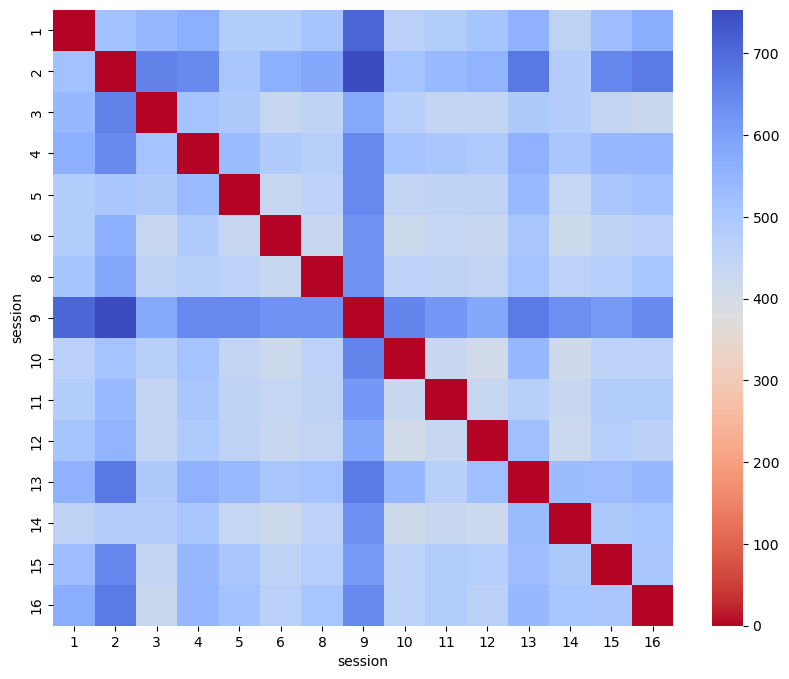

In [134]:

# Group the data by session and calculate the mean for each session
session_means = ppc_ex7.groupby('session').mean()

# Calculate the pairwise Euclidean distances between session means
distances = pdist(session_means.values, metric='euclidean')

# Convert the distances to a square matrix
dissimilarity_matrix = squareform(distances)

# Convert the matrix to a DataFrame for better readability
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=session_means.index, columns=session_means.index)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dissimilarity_df, cmap='coolwarm_r', fmt=".2f")

# Show the plot
plt.show()

In [135]:
# Create a 'video' column
ppc_ex7['video'] = ppc_ex7.index % 58 + 1

# Group by 'video' and calculate the mean for each column
mean_videos = ppc_ex7.groupby('video').mean()

print(mean_videos)

# Group the data by session and calculate the mean for each session
session_means = mean_videos

# Calculate the pairwise Euclidean distances between session means
distances = pdist(session_means.values, metric='euclidean')

# Convert the distances to a square matrix
dissimilarity_matrix = squareform(distances)

# Convert the matrix to a DataFrame for better readability
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=session_means.index, columns=session_means.index)


               1         2         3         4         5         6         7  \
video                                                                          
1       1.685452  0.330765 -1.269065  0.206488 -3.237404  3.755686  2.328886   
2       3.326749 -2.432905 -0.476542  1.444871 -3.079680  4.504839  2.388174   
3       1.417225 -1.076997 -2.993139 -0.429427 -0.598734  1.206344  1.513422   
4      -1.509315 -1.379265 -2.997599  1.391938 -1.088762  3.444116  1.311450   
5       0.432809 -0.471619 -1.853605  1.560609 -1.175828  2.936931  2.221484   
6      -3.820073 -5.887712  0.452446 -2.485116 -3.492678  2.518568 -0.402680   
7      -1.513566 -4.598883 -1.344347 -0.455216 -1.402103  2.485452  1.039327   
8      -0.104123 -3.745035  0.401922 -0.578410 -0.847869  1.988899  0.029323   
9       0.677248 -0.507321 -2.633828  2.384113  0.636049  1.761708  1.962261   
10     -1.420963 -0.637043 -2.365045  0.848318 -2.150638  1.159956 -2.167460   
11      1.306058 -2.440125 -1.593960 -0.

C:\Users\UmurY\AppData\Local\Temp\ipykernel_2220\2908352597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppc_ex7['video'] = ppc_ex7.index % 58 + 1


In [136]:
# Create a 'video' column
ppc['video'] = ppc.index % 58 + 1

# Extract all instances of video 56
video_56_df = ppc_ex7[ppc_ex7['video'] == 56]

print(video_56_df),

# Calculate the pairwise Euclidean distances between rows
distances = pdist(video_56_df.values, metric='euclidean')

# Convert the distances to a square matrix
dissimilarity_matrix = squareform(distances)

# Convert the matrix to a DataFrame for better readability
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=video_56_df.index, columns=video_56_df.index)

print(dissimilarity_df)


              1          2         3          4          5          6  \
55     3.322474 -14.166172 -5.372022  11.823600  -5.196731   2.125893   
113   15.521385  13.105348 -2.219377  -2.544369  -3.459105   5.168566   
171   -5.100252  -0.835846 -1.779487   5.781160  -3.931400   3.016580   
229    0.384170   3.619251  7.062323   5.492641   1.627566   8.408664   
287    2.693637   4.842985 -9.686945   6.264454  -0.989673   3.895880   
345  -17.051918 -13.625918  2.406734  -3.058086   5.453044  -1.712718   
461   -8.569626  -8.407673  2.144209   4.335011   0.113007   1.318709   
519 -257.729980 -78.517159  9.628465  34.799377 -26.298929 -29.038651   
577   -8.446941  -3.967122 -2.564400  -0.837422 -11.184587   5.898091   
635   -9.202483  -7.999160  0.188968 -10.538895 -10.032097  -2.725778   
693    2.154619 -20.918205  5.053218   1.157523  -2.866750   1.181745   
751    1.737069   3.628089 -7.202125   5.063801   4.834553  -8.183870   
809    4.330577   3.977285 -2.475204  -4.482419  -0

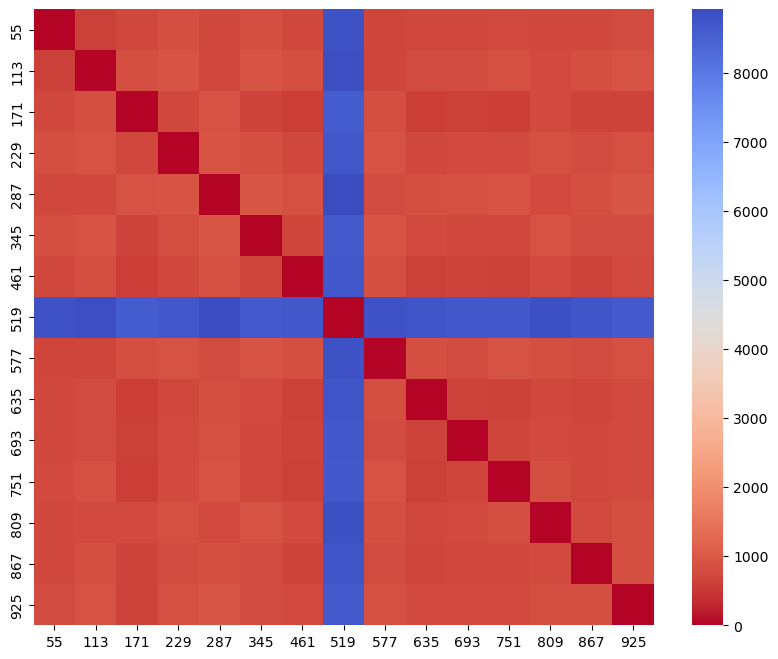

In [137]:
dissimilarity_df
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dissimilarity_df, cmap='coolwarm_r', fmt=".2f")

# Show the plot
plt.show()

#remoce session 9 as well
ppc_ex7_ex9 = ppc_ex7[ppc_ex7['session'] != 9]

In [145]:
# Create a 'video' column
ppc_ex7_ex9['video'] = ppc_ex7_ex9.index % 58 + 1

# Group by 'video' and calculate the mean for each column
mean_videos = ppc_ex7_ex9.groupby('video').mean()

mean_videos

C:\Users\UmurY\AppData\Local\Temp\ipykernel_2220\633104398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppc_ex7_ex9['video'] = ppc_ex7_ex9.index % 58 + 1


,1,2,3,4,5,6,7,8,9,10,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,session
video,,,,,,,,,,,,,,,,,,,,,
1,1.045668,0.556819,-1.614785,1.574813,-2.739465,2.541977,2.242608,0.394657,0.879535,-2.817871,...,0.069703,0.851987,2.127743,0.016735,1.442795,1.276457,1.124347,1.657494,0.964225,8.571429
2,2.608413,-2.085831,-0.861595,2.619075,-2.186469,3.149395,3.326009,0.496414,-0.510193,-4.630046,...,-0.230629,0.272134,1.522591,0.111896,-1.586138,-0.243993,3.219183,-0.787846,3.525221,8.571429
3,1.536736,0.020279,-2.798650,0.707313,0.219327,0.166797,1.950801,-1.341027,-0.425707,-4.072245,...,-0.341356,0.891448,-0.688192,0.123270,1.615820,-0.013868,3.223548,-0.974096,1.131578,8.571429
4,-2.094082,-0.699462,-3.022027,3.029583,-0.135701,2.920119,1.467186,0.354857,-1.179429,-4.250401,...,1.194847,1.971606,0.792057,0.931733,0.717742,0.542818,2.624889,0.137641,1.463574,8.571429
5,-0.626689,0.004098,-2.174604,2.533765,-0.450869,2.525799,2.180022,3.216333,-0.385676,-3.670387,...,0.645478,1.008634,2.169590,-0.424214,-0.941105,0.490784,1.531599,-0.816540,2.457859,8.571429
6,-5.004931,-5.907201,0.302678,-1.190187,-3.287522,0.843516,-0.951289,-0.946245,-1.155949,-4.096429,...,0.097670,1.387075,-0.434780,-0.095950,0.283662,-0.021740,1.843732,-1.366922,0.828486,8.571429
7,-2.229071,-4.242700,-1.467271,1.102369,-0.875980,0.958585,0.996929,-0.470273,-0.055058,-2.777411,...,1.196930,1.436933,0.546795,1.140397,-0.282925,0.819289,2.348053,-1.783367,0.788959,8.571429
8,-0.504833,-3.872199,0.115711,0.124865,-0.552021,1.177355,0.668513,-1.673204,-1.459730,-4.267037,...,0.207427,0.594520,0.346716,0.670366,2.260355,0.693947,1.585470,-1.021511,1.597101,8.571429
9,0.870910,0.515985,-2.047160,3.778739,1.261869,1.225798,2.402389,-0.200419,-1.757991,-3.848281,...,2.265726,2.451561,1.959506,0.345461,-0.815916,1.154370,1.025741,-0.227934,0.962064,8.571429


In [142]:
#remove row 519 frop ppc
ppc = ppc.drop(519, axis=0)

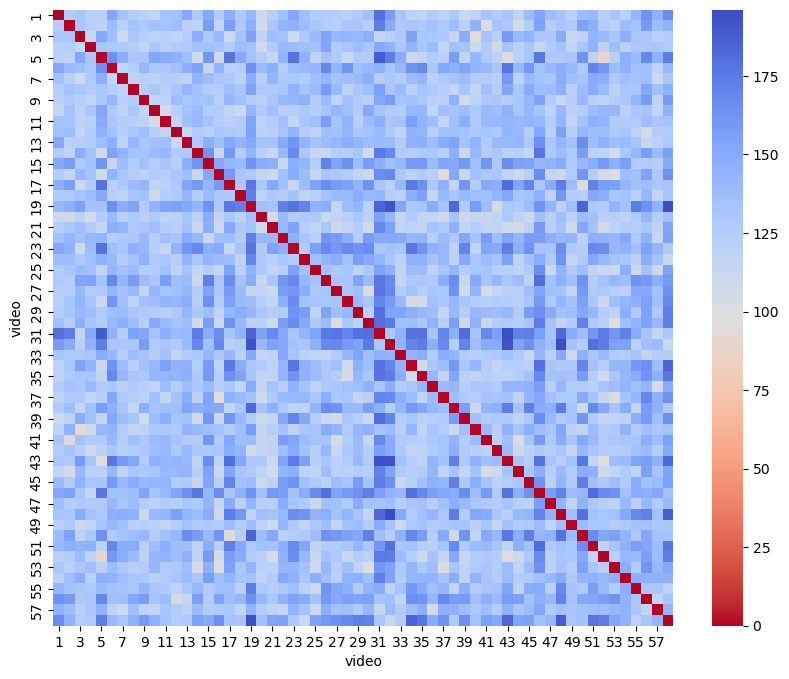

In [146]:


session_means = mean_videos

# Calculate the pairwise Euclidean distances between session means
distances = pdist(session_means.values, metric='euclidean')

# Convert the distances to a square matrix
dissimilarity_matrix = squareform(distances)

# Convert the matrix to a DataFrame for better readability
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=session_means.index, columns=session_means.index)

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dissimilarity_df, cmap='coolwarm_r', fmt=".2f")

# Show the plot
plt.show()